# Feature Engineering
Feature engineering is an important process in machine learning that aims to improve model performance by modifying, creating, or selecting relevant features (data columns) from a dataset. It encompasses various techniques such as:
* Numerical transformations (log, standardization, normalization)
* Outlier detection and handling
* Categorical data encoding
* Extracting new features from existing data

## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Load Dataset

In [2]:
dataset = sns.load_dataset("diamonds")

In [3]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Logarithmic Transformation and Data Visualization
This section aims to correct highly skewed price distributions by applying a logarithmic transformation and then displaying them in histogram form for a more normalized and easier analysis.

<Axes: >

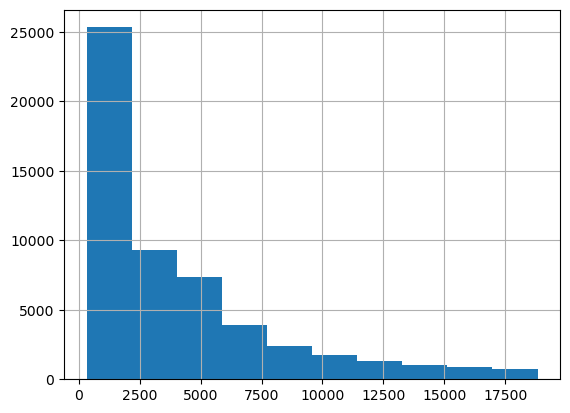

In [4]:
dataset["price"].hist()

## Logarithmic Transformation
Indicates a variation of the logarithmic transformation that adds 1 to avoid log(0), although in the case of prices this is usually not necessary.

In [5]:
log_price = dataset["price"].apply(np.log)
#log_price = dataset["price"].apply(lambda x: np.log(x) + 1)

<Axes: >

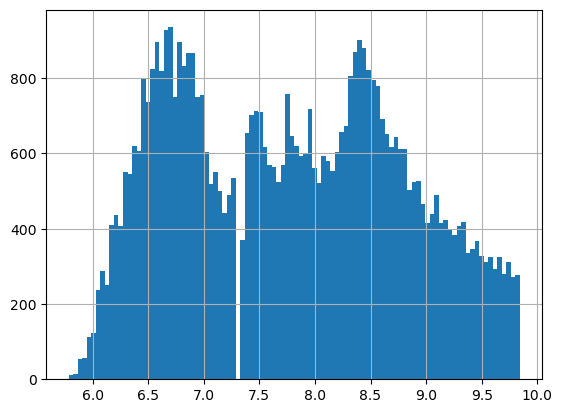

In [6]:
log_price.hist(bins = 100)

## Data Transformation

In [7]:
dataset["price"].apply(lambda x: np.log(x) + 1)

0        6.786897
1        6.786897
2        6.789960
3        6.811141
4        6.814131
           ...   
53935    8.921898
53936    8.921898
53937    8.921898
53938    8.921898
53939    8.921898
Name: price, Length: 53940, dtype: float64

## Outlier Detection Using IQR
Added a new feature to flag price data considered outliers based on the IQR (interquartile range) method, i.e., data that falls outside the lower and upper limits.

In [8]:
def outliers(x):

  q1, q3 = x.quantile([0.25, 0.75])
  iqr = q3 - q1

  if (x > q3 + 1.5 * iqr) or (x < q1 - 1.5 * iqr):
    return True
  else:
    return False


In [9]:
q1, q3 = dataset["price"].quantile([0.25, 0.75])
iqr = q3 - q1

def outliers(x):
  if (x > q3 + 1.5 * iqr) or (x < q1 - 1.5 * iqr):
    return True
  else:
    return False

dataset["price_outliers"] = dataset["price"].apply(outliers)
dataset["price_outliers"]

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: price_outliers, Length: 53940, dtype: bool

In [10]:
dataset[dataset["price_outliers"]]

,carat,cut,color,clarity,depth,table,price,x,y,z,price_outliers
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21,True
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06,True
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74,True
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08,True
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68,True
...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,True
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,True
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,True
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,True


## Manual Normalization with Min-Max Scaling

In [11]:
def min_max_scale(x):

  result = (x - x.min()) / (x.max() - x.min())

  return result

In [12]:
dataset[["price", "carat"]].apply(min_max_scale, axis = 0)

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


## Automatic Normalization with MinMaxScaler from Scikit-learn
Implements the same normalization (Min-Max) as before, but uses the sklearn library for greater efficiency and standardization.

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
min_max = MinMaxScaler()
hasil = min_max.fit_transform(dataset[["price", "carat"]])

In [15]:
pd.DataFrame(hasil, columns = ["price", "carat"])

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


## Manual Standardization (Z-Score)
Perform a manual transformation to a standard normal distribution using the Z-score formula ((x - mean) / std) for numeric features.

In [16]:
def normal_scale(x):

  result = (x - x.mean()) / x.std()

  return result

In [17]:
dataset[["price", "carat"]].apply(normal_scale, axis = 0)

,price,carat
0,-0.904087,-1.198157
1,-0.904087,-1.240350
2,-0.903836,-1.198157
3,-0.902081,-1.071577
4,-0.901831,-1.029384
...,...,...
53935,-0.294728,-0.164426
53936,-0.294728,-0.164426
53937,-0.294728,-0.206619
53938,-0.294728,0.130926


## Automatic Standardization with StandardScaler
Perform standardization as before, but use Scikit-learn's StandardScaler for greater practicality and direct use in machine learning pipelines.

In [18]:
from sklearn.preprocessing import StandardScaler

norm_scaler = StandardScaler()
hasil = norm_scaler.fit_transform(dataset[["price", "carat"]])

In [19]:
pd.DataFrame(hasil, columns = ["price", "carat"])

,price,carat
0,-0.904095,-1.198168
1,-0.904095,-1.240361
2,-0.903844,-1.198168
3,-0.902090,-1.071587
4,-0.901839,-1.029394
...,...,...
53935,-0.294731,-0.164427
53936,-0.294731,-0.164427
53937,-0.294731,-0.206621
53938,-0.294731,0.130927


## Categorical Encoding with .cat.codes
Converts categorical cut columns to numeric values using a label-based encoding method (0, 1, 2, ...). Suitable for algorithms that don't support strings.

In [20]:
dataset["cut"] = dataset["cut"].astype("category")
dataset["cut_encode"] = dataset["cut"].cat.codes
dataset[["cut", "cut_encode"]]

,cut,cut_encode
0,Ideal,0
1,Premium,1
2,Good,3
3,Premium,1
4,Good,3
...,...,...
53935,Ideal,0
53936,Good,3
53937,Very Good,2
53938,Premium,1


## Label Encoding and One-Hot Encoding with Scikit-learn
Demonstrates two encoding methods: LabelEncoder for single numeric labels and get_dummies() for one-hot binary representation of categories (with drop first to avoid dummy traps).

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cut_category = le.fit_transform(dataset["cut"])

In [22]:
cut_category

array([2, 3, 1, ..., 4, 3, 2])

In [23]:
le.inverse_transform(cut_category)

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

In [24]:
pd.get_dummies(dataset["cut"], drop_first = True)

,Premium,Very Good,Good,Fair
0,False,False,False,False
1,True,False,False,False
2,False,False,True,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
53935,False,False,False,False
53936,False,False,True,False
53937,False,True,False,False
53938,True,False,False,False


## One-Hot Encoding with Scikit-learn's OneHotEncoder
Performs explicit one-hot encoding using OneHotEncoder, resulting in a binary array representation for each category. Suitable for data processing in Scikit-learn pipelines.

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cut_category = ohe.fit_transform(dataset[["cut"]])

In [26]:
pd.DataFrame(cut_category.toarray())

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0
53938,0.0,0.0,0.0,1.0,0.0


In [27]:
pd.DataFrame(cut_category.toarray())

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0
53938,0.0,0.0,0.0,1.0,0.0
